# KMENSAH_ASSIGNMENT2

# Decision_Tree

Build a classification tree using Python. Only use the top-ten variables you chose in the Module 1 Assignment as the most relevant to creating a predictive model from the default-risk data. Prune the tree if necessary. Plot the tree visualization.

In [6]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    #confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
)

In [3]:
#pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Read the dataset

In [7]:
data1 = pd.read_csv("application_train.csv")

In [8]:
# copying data to another varaible to avoid any changes to original data
app_train = data1.copy()


In [9]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
app_train.shape

(307511, 122)

In [11]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(app_train.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [12]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

# CREATE DATEFRAME FOR PLOTS AFTER DECIDING ON VARIABLES

In [14]:
data=app_train

# MISSING VALUE

In [15]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*df.isnull().sum() / len(df)
    
    mis_val_table =pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending = False).round(1)
    
    print('Your selected dataframe has' + str(df.shape[1])+ 'columns.\n'
         "There are" + str(mis_val_table_ren_columns.shape[0])+ 'columns that have missing values.')
    
    return mis_val_table_ren_columns

In [16]:
# missing values check
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has122columns.
There are67columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [17]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [18]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

# Encoding Categorical Variables

In [19]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object':
        
        if len(list(app_train[col].unique())) <= 2:
            le.fit(app_train[col])
        # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
           
        
            le_count +=1
        
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [20]:
app_train = pd.get_dummies(app_train)


print('Training Feature shape: ', app_train.shape)



Training Feature shape:  (307511, 243)


In [21]:
train_labels =app_train['TARGET']



app_train['TARGET'] =train_labels

print('Training Feature shape: ', app_train.shape)


Training Feature shape:  (307511, 243)


In [22]:
correlations = app_train.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(50))
print('\nMost Negative Correlations:\n', correlations.head(50))

Most Positive Correlations:
 OCCUPATION_TYPE_Cleaning staff                       0.006979
ORGANIZATION_TYPE_Security                           0.007226
OCCUPATION_TYPE_Waiters/barmen staff                 0.007802
ORGANIZATION_TYPE_Agriculture                        0.007901
WALLSMATERIAL_MODE_Wooden                            0.007946
ORGANIZATION_TYPE_Trade: type 7                      0.008170
NAME_TYPE_SUITE_Unaccompanied                        0.008301
NAME_INCOME_TYPE_Unemployed                          0.008784
ORGANIZATION_TYPE_Trade: type 3                      0.008911
OBS_60_CNT_SOCIAL_CIRCLE                             0.009022
OBS_30_CNT_SOCIAL_CIRCLE                             0.009131
CNT_FAM_MEMBERS                                      0.009308
ORGANIZATION_TYPE_Industry: type 3                   0.009691
ORGANIZATION_TYPE_Restaurant                         0.010266
NAME_EDUCATION_TYPE_Lower secondary                  0.011747
OCCUPATION_TYPE_Cooking staff            

# From reviewing the correlations above we selected the independent variables below

# Selected Columns

1. SK_ID_CURR---ID of loan in our sample
2. TARGET---Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
3. FLAG_OWN_CAR---Flag if the client owns a car.
4. FLAG_OWN_REALTY---Flag if client owns a house or flat.
5. AMT_INCOME_TOTAL---Income of the client
6. AMT_CREDIT---Credit amount of the loan.
7. NAME_EDUCATION_TYPE---Level of highest education the client achieved.
8. DAYS_BIRTH---Client's age in days at the time of application.
9. DAYS_EMPLOYED---How many days before the application the person started current employment.

10.EXT_SOURCE_1---Normalized score from external data source

11. NAME_INCOME_TYPE---Clients income type (businessman, working, maternity leave,…)
12. CODE_GENDER---Gender of the client
13. OWN_CAR_AGE---Age of client's car


In [23]:
loan=app_train[['SK_ID_CURR','TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE_Secondary / secondary special','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NAME_INCOME_TYPE_Working','CODE_GENDER_M','CODE_GENDER_F','OWN_CAR_AGE']]

In [24]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  uint8  
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

In [25]:
loan["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [26]:
loan.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE_Secondary / secondary special,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,NAME_INCOME_TYPE_Working,CODE_GENDER_M,CODE_GENDER_F,OWN_CAR_AGE
0,100002,1,0,1,202500.0,406597.5,1,-9461,-637,0.083037,0.262949,0.139376,1,1,0,NaN
1,100003,0,0,0,270000.0,1293502.5,0,-16765,-1188,0.311267,0.622246,NaN,0,0,1,NaN
2,100004,0,1,1,67500.0,135000.0,1,-19046,-225,NaN,0.555912,0.729567,1,1,0,26.0
3,100006,0,0,1,135000.0,312682.5,1,-19005,-3039,NaN,0.650442,NaN,1,0,1,NaN
4,100007,0,0,1,121500.0,513000.0,1,-19932,-3038,NaN,0.322738,NaN,1,1,0,NaN


# Check for missing values on Selected Variables/Columns 

In [27]:
loan.isnull().sum()

SK_ID_CURR                                                0
TARGET                                                    0
FLAG_OWN_CAR                                              0
FLAG_OWN_REALTY                                           0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
NAME_EDUCATION_TYPE_Secondary / secondary special         0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
EXT_SOURCE_1                                         173378
EXT_SOURCE_2                                            660
EXT_SOURCE_3                                          60965
NAME_INCOME_TYPE_Working                                  0
CODE_GENDER_M                                             0
CODE_GENDER_F                                             0
OWN_CAR_AGE                                          202929
dtype: int64

# FINAL TEN

From above the Final 10 Variables to be focused on will be:

    1. FLAG_OWN_CAR
    
    2. FLAG_OWN_REALTY
    
    3. AMT_INCOME_TOTAL
    
    4. AMT_CREDIT
    
    5. NAME_EDUCATION_TYPE
    
    6. DAYS_BIRTH
    
    7. DAYS_EMPLOYED
    
    8. EXT_SOURCE_2
    
    9. NAME_INCOME_TYPE
    
    10. CODE_GENDER
    
    
    These 10 were selected because based on research of the domain, strong correlation to TARGET and minimal missing values which will  require substantial imputation of values.
    

# Model Building - Approach

1. Data preparation
2. Partition the data into train and test set.
3. Build a CART model on the train data.
4. Tune the model and prune the tree, if required.

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   FLAG_OWN_CAR                                       307511 non-null  int32  
 3   FLAG_OWN_REALTY                                    307511 non-null  int32  
 4   AMT_INCOME_TOTAL                                   307511 non-null  float64
 5   AMT_CREDIT                                         307511 non-null  float64
 6   NAME_EDUCATION_TYPE_Secondary / secondary special  307511 non-null  uint8  
 7   DAYS_BIRTH                                         307511 non-null  int64  
 8   DAYS_EMPLOYED                                      307511 non-null  int64 

In [29]:
# checking for unique values in ID column
loan["SK_ID_CURR"].nunique()

307511

Since all the values in SK_ID_CURR column are unique we can drop it

In [30]:
loan10=data[['TARGET','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_EDUCATION_TYPE','DAYS_BIRTH','DAYS_EMPLOYED','EXT_SOURCE_2','NAME_INCOME_TYPE','CODE_GENDER']]

In [31]:
loan10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  int64  
 1   FLAG_OWN_CAR         307511 non-null  int32  
 2   FLAG_OWN_REALTY      307511 non-null  int32  
 3   AMT_INCOME_TOTAL     307511 non-null  float64
 4   AMT_CREDIT           307511 non-null  float64
 5   NAME_EDUCATION_TYPE  307511 non-null  object 
 6   DAYS_BIRTH           307511 non-null  int64  
 7   DAYS_EMPLOYED        307511 non-null  int64  
 8   EXT_SOURCE_2         306851 non-null  float64
 9   NAME_INCOME_TYPE     307511 non-null  object 
 10  CODE_GENDER          307511 non-null  object 
dtypes: float64(3), int32(2), int64(3), object(3)
memory usage: 23.5+ MB


In [32]:
loan10.isnull().sum()

TARGET                   0
FLAG_OWN_CAR             0
FLAG_OWN_REALTY          0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
NAME_EDUCATION_TYPE      0
DAYS_BIRTH               0
DAYS_EMPLOYED            0
EXT_SOURCE_2           660
NAME_INCOME_TYPE         0
CODE_GENDER              0
dtype: int64

# Missing Value Treatment

In [33]:
print('Imputing median value for EXT_SOURCE_2 with Nan values:')
loan10['EXT_SOURCE_2'].fillna(loan10['EXT_SOURCE_2'].median(), inplace=True)
print('Imputing done. Lets check if any of records have Nan Seats')
print(loan10[loan10['EXT_SOURCE_2'].isna()].count().sum())
print('EXT_SOURCE_2:')
loan10['EXT_SOURCE_2'].value_counts()

Imputing median value for EXT_SOURCE_2 with Nan values:
Imputing done. Lets check if any of records have Nan Seats
0
EXT_SOURCE_2:


0.285898    721
0.565961    662
0.262258    417
0.265256    343
0.159679    322
           ... 
0.115152      1
0.062815      1
0.009800      1
0.150713      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

In [34]:
loan10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   TARGET               307511 non-null  int64  
 1   FLAG_OWN_CAR         307511 non-null  int32  
 2   FLAG_OWN_REALTY      307511 non-null  int32  
 3   AMT_INCOME_TOTAL     307511 non-null  float64
 4   AMT_CREDIT           307511 non-null  float64
 5   NAME_EDUCATION_TYPE  307511 non-null  object 
 6   DAYS_BIRTH           307511 non-null  int64  
 7   DAYS_EMPLOYED        307511 non-null  int64  
 8   EXT_SOURCE_2         307511 non-null  float64
 9   NAME_INCOME_TYPE     307511 non-null  object 
 10  CODE_GENDER          307511 non-null  object 
dtypes: float64(3), int32(2), int64(3), object(3)
memory usage: 23.5+ MB


In [35]:
loan10.isnull().sum()

TARGET                 0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
NAME_EDUCATION_TYPE    0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
EXT_SOURCE_2           0
NAME_INCOME_TYPE       0
CODE_GENDER            0
dtype: int64

Split Data

In [36]:
X = loan10.drop(["TARGET"], axis=1)
y = loan10["TARGET"]

In [37]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_2,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,CODE_GENDER_M,CODE_GENDER_XNA
0,0,1,202500.0,406597.5,-9461,-637,0.262949,0,0,0,1,0,0,0,0,0,0,1,1,0
1,0,0,270000.0,1293502.5,-16765,-1188,0.622246,1,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,67500.0,135000.0,-19046,-225,0.555912,0,0,0,1,0,0,0,0,0,0,1,1,0
3,0,1,135000.0,312682.5,-19005,-3039,0.650442,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,1,121500.0,513000.0,-19932,-3038,0.322738,0,0,0,1,0,0,0,0,0,0,1,1,0


In [38]:
#@title Splitting dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [39]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 215257
Number of rows in test data = 92254


In [40]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 215257
Number of rows in test data = 92254


# Build Decision Tree Model

In [41]:
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
from scipy.stats import randint # Generate random numbers

In [42]:
#@title Building the Decision Tree
clf = tree.DecisionTreeClassifier() # Create Decision Tree classifer object
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer

In [43]:
#@title Evaluating the Tree model
y_hat = clf.predict(X_train) # Predict the response for train dataset

y_pred = clf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.849610856981811


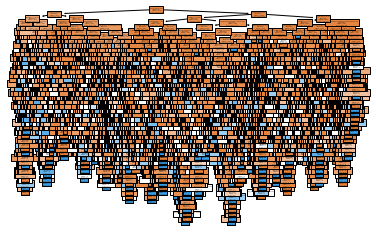

In [44]:
#@title Visualizing the Tree

f_names=list(X.columns) # Feature names
tree.plot_tree(clf, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text

# Tuning the Tree

There are several parameters that can be adjusted to obtain a suitable tree such as criterion, max_depth, min_samples_leaf, etc. Typically, the tree depth has the greatest impact on accuracy and generalization

Train Accuracy: 0.9193615074074246
Test Accuracy: 0.9190604201443839


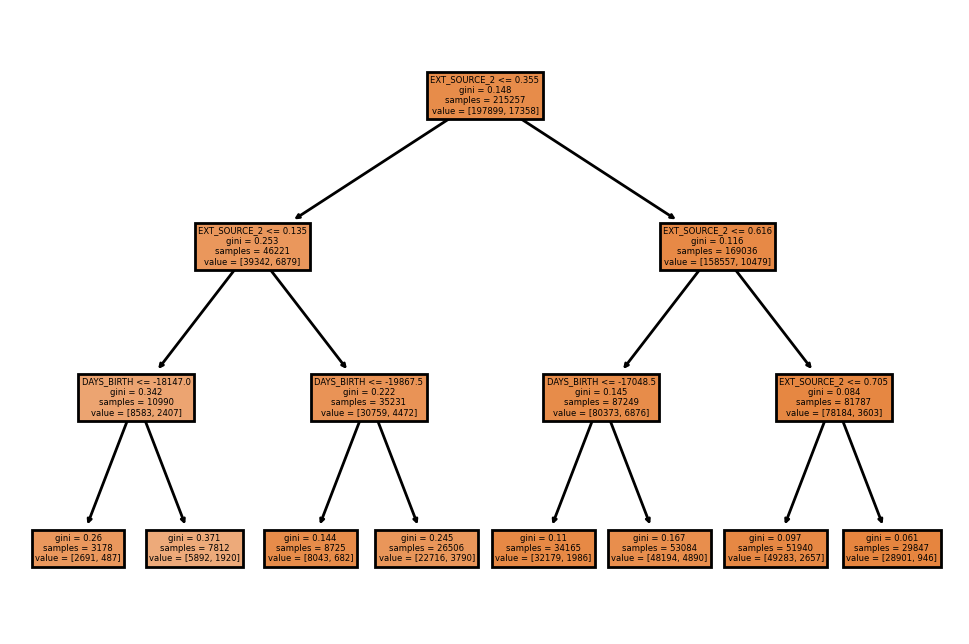

In [45]:
# Create Decision Tree classifer object by spefifying parameters
# Try using max_depth=3, min_samples_split=100, min_samples_leaf=20, criterion="entropy"
clf = tree.DecisionTreeClassifier(max_depth=3) 

# Train and test the classifier
clf = clf.fit(X_train, y_train) # Train Decision Tree Classifer
y_hat = clf.predict(X_train) # Predict the response for train dataset
y_pred = clf.predict(X_test) # Predict the response for test dataset

# Compute training and test accuracy
print("Train Accuracy:", metrics.accuracy_score(y_train, y_hat))
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))

plt.rcParams['figure.dpi'] = 200 # To increase the resolution from 100dpi to 200dpi

# Plot the tree
f_names=list(X.columns) # Feature names
tree.plot_tree(clf, filled=True, feature_names=f_names) # Plot the tree
plt.show() # Show without the rules in plain text